<img src="mioti.png" style="height: 100px">
<center style="color:#888">Data Science with Python</center>

# DSPy2. NumPy "advanced". Challenge

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Broadcasting-into-practice:-feature-scaling-through-standarization" data-toc-modified-id="Broadcasting-into-practice:-feature-scaling-through-standarization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Broadcasting into practice: feature scaling through standarization</a></span></li><li><span><a href="#Sistemas-de-coordenadas---Vectorización" data-toc-modified-id="Sistemas-de-coordenadas---Vectorización-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sistemas de coordenadas - Vectorización</a></span></li></ul></div>

## Broadcasting into practice: feature scaling through standarization

Con algunas excepciones, los algoritmos de Machine Learning no funcionan del todo bien si los atributos numéricos que se les pasan tienen escalas muy diferentes ([further reading](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)). Una técnica que puede usarse para que todos los atributos tengan la misma escala es la estandarización: sustraerles la media (para que sea 0) y dividirlos por la desviación típica (de modo que la varianza resultante sea 1). 

a) Imaginemos que tenemos un array con datos de un sensor en una playa, que mide tres atributos como serían viento, oleaje y temperatura, en distintas unidades que tienen distintas escalas. Esas mediciones nos llegan en un array con 3 columnas (una por feature) y 1000 filas (una fila por cada instante de tiempo del que tenemos las medidas). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.random.normal(loc=[-10, 0, 10], scale=[2, 1, 2], size=(1000,3))
data.shape

Estandariza esa matriz de manera vectorial: réstale la media por columna y divide por la desviación típica de cada columna.

In [3]:
# VAMOS A ESTANDARIZAR LOS VALORES DE LA MATRIZ PARA ELLO CALCULAMOS LAS MEADIA Y 
# LA DESVIACIÓN TIPICA DE CADA COLUMNA.
# PARA ELLO CREAMOS LA SIGUIENTE FUNCIÓN.

def normaliza_x_columnas (data):
    
    data_temp=np.copy(data)
   
    #Extraemos el número de columnas a normalizar
    num_columns= data_temp.shape[1]
    
    #Recorremos el número de columnas a normalizar
    for column in range(num_columns):

        mean_column= np.mean(data_temp[:,column])
        std_column = np.std(data_temp[:,column])
        data_temp[:,column] = (data_temp[:,column] - mean_column)/std_column
        
   
    return data_temp


In [4]:
#Llamamos a la función para que normalice por columnas
data_normalizado_x_columnas=normaliza_x_columnas(data)
data_normalizado_x_columnas

array([[ 1.87281742, -0.99398861, -0.39041771],
       [-0.63579562, -0.21248256,  1.41733836],
       [ 0.04191175, -1.31168896, -0.33620736],
       ...,
       [ 0.32803247,  1.05155833, -0.33490896],
       [-0.40652497,  0.46228787, -0.33245013],
       [ 1.37079443,  0.38409505, -0.51110554]])

<function matplotlib.pyplot.show(close=None, block=None)>

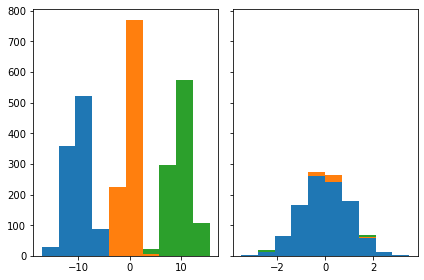

In [5]:
# Representamos graficamante la distribución de cada una de las variables (columnas)
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(data, bins=10,  histtype='stepfilled')
axs[1].hist(data_normalizado_x_columnas, bins=10,  histtype='stepfilled')
plt.show

b) Imaginemos ahora que el array 2d tiene una fila por cada feature y una columna por cada medición (la transpuesta de la matriz anterior). ¿Cómo vectorizamos la operación ahora? (réstale la media por fila y divide por la desviación típica por fila). ¡No vale transponer data!

In [6]:
data = np.random.normal(loc=[-10, 0, 10], scale=[2, 1, 2], size=(1000,3)).T
data.shape

(3, 1000)

In [7]:
# VAMOS A ESTANDARIZAR LOS VALORES DE LA MATRIZ PARA ELLO CALCULAMOS LAS MEDIA Y 
# LA DESVIACIÓN TIPICA DE CADA COLUMNA.
# PARA ELLO CREAMOS LA SIGUIENTE FUNCIÓN.

def normaliza_x_filas (data):
    
    data_temp=np.copy(data)
     #Extraemos el número de columnas a normalizar
    numero_filas= data_temp.shape[0]

     #Recorremos el número de filas a normalizar
        
    for fila in range(numero_filas):

        mean_fila= np.mean(data_temp[fila,:])
        std_fila = np.std(data_temp[fila,:])
        data_temp[fila,:] = (data_temp[fila,:] - mean_fila)/std_fila
                
    return data_temp

In [8]:
#Llamamos a la función para que normalice por columnas
data_normalizado_x_filas=normaliza_x_filas(data)
data_normalizado_x_filas

array([[ 0.56699193,  0.55429194, -0.88699137, ..., -1.23919895,
         0.06790615,  2.52690523],
       [-1.50131735,  2.32933327,  0.5764636 , ...,  1.02260567,
         0.31694938, -0.03457593],
       [ 0.16645243, -2.36863127,  0.73630736, ..., -0.56083254,
         1.81094734,  0.40641054]])

In [9]:
data.shape

(3, 1000)

<function matplotlib.pyplot.show(close=None, block=None)>

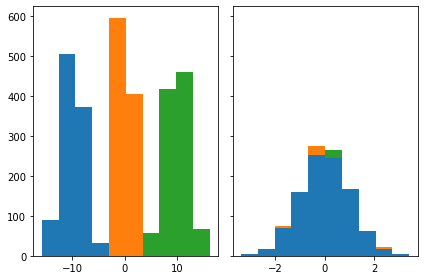

In [10]:
# Representamos graficamante la distribución de cada una de las variables (filas) aunque hay que trasponerlas
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(data.T, bins=10,  histtype='stepfilled')
axs[1].hist(data_normalizado_x_filas.T, bins=10,  histtype='stepfilled')
plt.show

## Sistemas de coordenadas - Vectorización

Vamos a escribir funciones para convertir puntos dados en un sistema de coordenadas cartesianas a los mismos puntos expresados en un sistema de coordenadas polares.

<img src="coordinates.png" style="height: 200px;float: left">

Dado un punto en coordenadas cartesianas $(x,y)$, sus correspondientes coordenadas polares $(r, \varphi)$ se obtienen como sigue:

\begin{equation}
r = \sqrt{(x^2+y^2)}
\end{equation}
\begin{equation}
\varphi = arctan\left(\frac{y}{x}\right)
\end{equation}

<div style="clear: left"/>

* Escribe una función usando NumPy y otra basada en Python puro tal que, dado un array o lista, respectivamente, de coordenadas cartesianas, devuelva un array o lista de coordenadas polares. 
* Compara su rendimiento (hint: magic commands de Jupyter notebook)




In [11]:
num_muestras_input = 10000
Z_cartesian = np.random.random((num_muestras_input,2))
lista_Z_cartesian = Z_cartesian.tolist()

In [12]:
#SOLUCION 1: CON ARRAYS DE NumPy
def coordenadas_polares_np (Z_cartesian):
    
    array_temp = np.copy(Z_cartesian)
    
    r = np.sqrt(np.square(array_temp[:,0])+np.square(array_temp[:,1]))
    p = np.arctan (array_temp[:,1]/array_temp[:,0])
 
    array_temp[:,0]=r
    array_temp[:,1]=p
    
    return array_temp
   


In [13]:
%%time
Z_polar = coordenadas_polares_np(Z_cartesian)
Z_polar

Wall time: 1 ms


array([[1.07894664, 0.9476352 ],
       [0.98122782, 0.56171761],
       [0.90997334, 1.22876721],
       ...,
       [0.88522563, 0.99310995],
       [0.38952208, 0.23737327],
       [0.78879132, 1.19696976]])

In [14]:
#SOLUCION 2: CON LISTAS PYTHON
def coordenadas_polares_py (lista_Z_cartesian):
    
    lista_temp = lista_Z_cartesian
    
    for cordenadas in lista_temp:
        r = np.sqrt(np.square(cordenadas[0])+np.square(cordenadas[1]))
        p = np.arctan (cordenadas[1]/cordenadas[0])
        cordenadas[0]=r
        cordenadas[1]=p
    
    return lista_temp

In [15]:
%%time
lista_Z_polar = coordenadas_polares_py(lista_Z_cartesian)
lista_Z_polar

Wall time: 44 ms


[[1.0789466409763977, 0.947635200453832],
 [0.981227818338495, 0.5617176114850034],
 [0.9099733354027086, 1.2287672053151808],
 [0.9254543011933952, 0.1212651828758821],
 [0.8720150661104401, 0.08200177273513708],
 [0.9761297626855514, 1.5360356051032498],
 [0.8936695507503203, 1.3869431731401018],
 [0.8299237734971674, 1.1939837558730684],
 [0.518799156524178, 1.0970394220707158],
 [0.25691645555609194, 1.4035660828025245],
 [0.6629459882520278, 0.7407890437755276],
 [0.8685310522818039, 0.447367748104345],
 [0.5445059888560315, 0.5747219532409082],
 [0.9632265652837931, 1.1248383080120143],
 [0.36843127251769103, 0.027165152864652726],
 [0.4369831777400046, 0.34367981183734914],
 [0.9782813582863813, 0.7425126191451469],
 [0.42067733296514703, 0.6379526885507223],
 [0.8797656333125876, 0.8428334619458412],
 [0.951674378951918, 1.4631227201063215],
 [0.40489663722663516, 0.11845724065087823],
 [0.16393912905596264, 1.3172045992813948],
 [1.1040259639203405, 0.9403880526198022],
 [0.82